# Analysis of DNA-MERFISH for CTP11

by Pu Zheng

2021.12.10

analysis for dataset:

\\10.245.74.158\Chromatin_NAS_4\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216

This data is DNA of smFISH RNA:
    \\10.245.74.158\Chromatin_NAS_6\20211216-P_brain_CTP12-RNA



In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

18496


# 0. fov parameters

In [2]:
reload(ia)
reload(classes)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)
reload(get_img_info)
reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)

fov_param = {'data_folder':[r'\\10.245.74.158\Chromatin_NAS_5\20220109-CTP11-1000_CTP12-DNA_from_1230',
                            r'\\10.245.74.158\Chromatin_NAS_6\20220109-CTP11-1000_CTP12-DNA_from_1230',],
             'save_folder':r'J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230',
             'experiment_type': 'DNA',
             'num_threads': 34,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor_from_60_to_50',
             'shared_parameters':{
                     'single_im_size':[50,2048,2048],
                     'distance_zxy': [250, 108, 108],
                     'corr_channels':['750','647'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':True,
                     'corr_bleed':True,
                     'min_num_seeds':10,
                     'max_num_seeds': None,
                     'spot_seeding_th': 1000,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':True
                 }, 
             }


In [ ]:
_overwrite = False
sel_fov_ids = np.arange(0, 50)
#sel_fov_ids = np.arange(90, 120)
for _fov_id in sel_fov_ids:

    fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                              _color_info_kwargs={
                                                  '_color_filename':'Color_Usage',
                                              }, 
                                              _prioritize_saved_attrs=False,
                                              _save_info_to_file=True,
                                              )
    
    # 2. Process image into candidate spots
    fov.parallel = True
    fov.combo_ref_id = 0
    fov._process_image_to_spots('combo', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=True,
                                _warp_images=False, 
                                _fit_spots=True,
                                _overwrite_drift=_overwrite, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite,
                                _verbose=True)
    # 3. Process image into candidate spots
    fov.parallel = True
    fov.unique_ref_id = 0
    fov._process_image_to_spots('unique', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=True,
                                _warp_images=False, 
                                _fit_spots=True,
                                _overwrite_drift=_overwrite, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite,
                                _verbose=True)
    # 4. DAPI image
    fov._load_dapi_image()

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 59
- Number of field of views: 159
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 5
- Number of field of views: 160
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20220109-CTP11-1000_CTP12-DNA_from_1230\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '405']
dict_keys(['H0C1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C26', 'H26C27', 'H27C28', 'H28C29', 'H29C30', 'H30C31', 'H31C32', 'H32C33', 'H33C34', 'H34C35', 'H35C36', 'H36C37', 'H37C38', 'H38C39', 'H39C40', 'H40C41', 'H41C42', 'H42C43', 'H43C44', 'H44C45', 'H45C46', 'H46C47', 'H47C48', 'H48C49', 'H49C50', 'H50U1', 'H51U2', 'H52U3', 'H53U4', 'H54U5', 'H55U6', 'H56U7', 'H57U8', 'H58U9', 'H59U10', 'H60U11', 'H61U12', 'H62U1

-- checking combo, region:[ 9 10] in 0.071s.
-- checking combo, region:[11 12] in 0.065s.
-- checking combo, region:[13 14] in 0.106s.
-- checking combo, region:[15 16] in 0.064s.
-- checking combo, region:[17 18] in 0.038s.
-- checking combo, region:[19 20] in 0.037s.
-- checking combo, region:[21 22] in 0.063s.
-- checking combo, region:[23 24] in 0.045s.
-- checking combo, region:[25 26] in 0.052s.
-- checking combo, region:[27 28] in 0.066s.
-- checking combo, region:[29 30] in 0.076s.
-- checking combo, region:[31 32] in 0.039s.
-- checking combo, region:[33 34] in 0.055s.
-- checking combo, region:[35 36] in 0.074s.
-- checking combo, region:[37 38] in 0.053s.
-- checking combo, region:[39 40] in 0.071s.
-- checking combo, region:[41 42] in 0.059s.
-- checking combo, region:[43 44] in 0.067s.
-- checking combo, region:[45 46] in 0.063s.
-- checking combo, region:[47 48] in 0.062s.
-- checking combo, region:[49 50] in 0.057s.
-- checking combo, region:[51 52] in 0.117s.
-- checkin

directly return existing attribute.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 59
- Number of field of views: 159
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 5
- Number of field of views: 160
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20220109-CTP11-1000_CTP12-DNA_from_1230\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '405']
dict_keys(['H0C1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C26', 'H26C27', 'H27C28', 'H28C29', 'H29C30', 'H30C31', 'H31C32', 'H32C33', 'H33C34', 'H34C35', 'H35C36', 'H36C37', 'H37C38', 'H38C39', 'H39C40', 'H40C41', 'H41C42', 'H42C43', 'H43C44', 'H44C45', 'H45C46', 'H46C47', 'H47C48', 'H48C49', 'H49C50', 'H50U1', 'H51U2', 'H52U3', 'H53U4', 'H54U5', 'H55U6', 'H56U7', 'H57U8', 'H58U9', 

-- checking combo, region:[ 9 10] in 0.034s.
-- checking combo, region:[11 12] in 0.035s.
-- checking combo, region:[13 14] in 0.066s.
-- checking combo, region:[15 16] in 0.041s.
-- checking combo, region:[17 18] in 0.064s.
-- checking combo, region:[19 20] in 0.031s.
-- checking combo, region:[21 22] in 0.029s.
-- checking combo, region:[23 24] in 0.029s.
-- checking combo, region:[25 26] in 0.029s.
-- checking combo, region:[27 28] in 0.054s.
-- checking combo, region:[29 30] in 0.033s.
-- checking combo, region:[31 32] in 0.035s.
-- checking combo, region:[33 34] in 0.034s.
-- checking combo, region:[35 36] in 0.034s.
-- checking combo, region:[37 38] in 0.029s.
-- checking combo, region:[39 40] in 0.047s.
-- checking combo, region:[41 42] in 0.029s.
-- checking combo, region:[43 44] in 0.055s.
-- checking combo, region:[45 46] in 0.071s.
-- checking combo, region:[47 48] in 0.090s.
-- checking combo, region:[49 50] in 0.052s.
-- checking combo, region:[51 52] in 0.043s.
-- checkin

-- checking unique, region:[21 22] in 0.022s.
-- checking unique, region:[23 24] in 0.019s.
-- checking unique, region:[25 26] in 0.020s.
-- checking unique, region:[27 28] in 0.017s.
- No unique images and spots requires processing, skip.
-- choose dapi images from folder: \\10.245.74.158\Chromatin_NAS_5\20220109-CTP11-1000_CTP12-DNA_from_1230\H0C1.
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20220109-CTP11-1000_CTP12-DNA_from_1230\H0C1\Conv_zscan_005.dax
-- loading illumination correction profile from file:
	 405 illumination_correction_405_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_5\20220109-CTP11-1000_CTP12-DNA_from_1230\H0C1\Conv_zscan_005.dax [3]
[3]
 in 6.372s
-- removing hot pixels for channels:['405'] in 12.051s
-- correct Z-shifts for channels:['405'] in 11.285s
-- illumination correction for channels: 405, in 4.909s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 36.226s
-- saving fov_info to file: J:\

- 64 folders are found according to color-usage annotation.
+ loading fov_info from file: J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Conv_zscan_007.hdf5
++ base attributes loaded:['combo_ref_im', 'unique_ref_im'] in 9.466s.
+ loading correction from file: J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Conv_zscan_007.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Conv_zscan_007.hdf5
++ base attributes loaded:[] in 0.014s.
-- saving fov_info to file: J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Conv_zscan_007.hdf5
++ base attributes saved:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'color_filename', 'color_format', 'combo_ref_im', 'correction_folder', 'dapi_

-- checking combo, region:[15 16] in 0.039s.
-- checking combo, region:[17 18] in 0.032s.
-- checking combo, region:[19 20] in 0.056s.
-- checking combo, region:[21 22] in 0.046s.
-- checking combo, region:[23 24] in 0.038s.
-- checking combo, region:[25 26] in 0.039s.
-- checking combo, region:[27 28] in 0.059s.
-- checking combo, region:[29 30] in 0.053s.
-- checking combo, region:[31 32] in 0.033s.
-- checking combo, region:[33 34] in 0.030s.
-- checking combo, region:[35 36] in 0.042s.
-- checking combo, region:[37 38] in 0.050s.
-- checking combo, region:[39 40] in 0.052s.
-- checking combo, region:[41 42] in 0.034s.
-- checking combo, region:[43 44] in 0.032s.
-- checking combo, region:[45 46] in 0.053s.
-- checking combo, region:[47 48] in 0.033s.
-- checking combo, region:[49 50] in 0.045s.
-- checking combo, region:[51 52] in 0.033s.
-- checking combo, region:[53 54] in 0.049s.
-- checking combo, region:[55 56] in 0.050s.
-- checking combo, region:[57 58] in 0.034s.
-- checkin

-- checking unique, region:[1 2] in 0.019s.
-- checking unique, region:[3 4] in 0.013s.
-- checking unique, region:[5 6] in 0.014s.
-- checking unique, region:[7 8] in 0.011s.
-- checking unique, region:[ 9 10] in 0.015s.
-- checking unique, region:[11 12] in 0.012s.
-- checking unique, region:[13 14] in 0.015s.
-- checking unique, region:[15 16] in 0.012s.
-- checking unique, region:[17 18] in 0.013s.
-- checking unique, region:[19 20] in 0.010s.
-- checking unique, region:[21 22] in 0.015s.
-- checking unique, region:[23 24] in 0.011s.
-- checking unique, region:[25 26] in 0.014s.
-- checking unique, region:[27 28] in 0.015s.
- No unique images and spots requires processing, skip.
-- choose dapi images from folder: \\10.245.74.158\Chromatin_NAS_5\20220109-CTP11-1000_CTP12-DNA_from_1230\H0C1.
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20220109-CTP11-1000_CTP12-DNA_from_1230\H0C1\Conv_zscan_009.dax
-- loading illumination correction profile from file:
	 405 illu

+ loading fov_info from file: J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Conv_zscan_011.hdf5
++ base attributes loaded:['combo_ref_im', 'unique_ref_im'] in 8.600s.
+ loading correction from file: J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Conv_zscan_011.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Conv_zscan_011.hdf5
++ base attributes loaded:[] in 0.009s.
-- saving fov_info to file: J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Conv_zscan_011.hdf5
++ base attributes saved:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'color_filename', 'color_format', 'combo_ref_im', 'correction_folder', 'dapi_channel', 'dapi_channel_index', 'data_folder', 'debug', 'dri

-- checking combo, region:[27 28] in 0.046s.
-- checking combo, region:[29 30] in 0.029s.
-- checking combo, region:[31 32] in 0.058s.
-- checking combo, region:[33 34] in 0.079s.
-- checking combo, region:[35 36] in 0.033s.
-- checking combo, region:[37 38] in 0.050s.
-- checking combo, region:[39 40] in 0.068s.
-- checking combo, region:[41 42] in 0.031s.
-- checking combo, region:[43 44] in 0.028s.
-- checking combo, region:[45 46] in 0.043s.
-- checking combo, region:[47 48] in 0.038s.
-- checking combo, region:[49 50] in 0.030s.
-- checking combo, region:[51 52] in 0.033s.
-- checking combo, region:[53 54] in 0.105s.
-- checking combo, region:[55 56] in 0.033s.
-- checking combo, region:[57 58] in 0.029s.
-- checking combo, region:[59 60] in 0.038s.
-- checking combo, region:[61 62] in 0.041s.
-- checking combo, region:[63 64] in 0.044s.
-- checking combo, region:[65 66] in 0.044s.
-- checking combo, region:[67 68] in 0.029s.
-- checking combo, region:[69 70] in 0.028s.
-- checkin

-- choose dapi images from folder: \\10.245.74.158\Chromatin_NAS_5\20220109-CTP11-1000_CTP12-DNA_from_1230\H0C1.
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20220109-CTP11-1000_CTP12-DNA_from_1230\H0C1\Conv_zscan_013.dax
-- loading illumination correction profile from file:
	 405 illumination_correction_405_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_5\20220109-CTP11-1000_CTP12-DNA_from_1230\H0C1\Conv_zscan_013.dax [3]
[3]
 in 7.243s
-- removing hot pixels for channels:['405'] in 11.259s
-- correct Z-shifts for channels:['405'] in 14.273s
-- illumination correction for channels: 405, in 4.215s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 38.096s
-- saving fov_info to file: J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Conv_zscan_013.hdf5
++ base attributes saved:['dapi_im'] in 10.053s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 59
- Number of field of views: 159
Get Folder Names: (

-- loading image from file:\\10.245.74.158\Chromatin_NAS_5\20220109-CTP11-1000_CTP12-DNA_from_1230\H0C1\Conv_zscan_014.dax [3]
[3]
 in 7.750s
-- removing hot pixels for channels:['405'] in 13.619s
-- correct Z-shifts for channels:['405'] in 13.091s
-- illumination correction for channels: 405, in 5.344s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 40.930s
-- saving fov_info to file: J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Conv_zscan_014.hdf5
++ base attributes saved:['dapi_im'] in 10.389s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 59
- Number of field of views: 159
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 5
- Number of field of views: 160
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20220109-CTP11-1000_CTP12-DNA_from_1230\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '405']
dict_keys(['H0C1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8

-- checking combo, region:[93 94] in 0.010s.
-- checking combo, region:[95 96] in 0.009s.
-- checking combo, region:[97 98] in 0.010s.
-- checking combo, region:[99] in 0.009s.
+ Start multi-processing of pre-processing for 50 images with 34 threads
++ processing combo ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99] , finish in 4761.70s.
-- folders not selected, allow processing all 64 folders
+ load reference image from file:\\10.245.74.158\Chromatin_NAS_5\20220109-CTP11-1000_CTP12-DNA_from_1230\H0C1\Conv_zscan_015.dax
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20220109-CTP11-1000_CTP12-DNA_from_1230\H0C1\Conv_zscan_015.dax
-- loading illumination correction profile from file:
	 561 illumination_correction

-- loading image from file:\\10.245.74.158\Chromatin_NAS_5\20220109-CTP11-1000_CTP12-DNA_from_1230\H0C1\Conv_zscan_016.dax [2]
[2]
 in 7.703s
-- removing hot pixels for channels:['561'] in 9.024s
-- correct Z-shifts for channels:['561'] in 6.800s
-- illumination correction for channels: 561, in 2.678s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 27.055s
-- saving fov_info to file: J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Conv_zscan_016.hdf5
++ base attributes saved:['combo_ref_im'] in 7.772s.
-- checking combo, region:[1 2] in 0.010s.
-- checking combo, region:[3 4] in 0.008s.
-- checking combo, region:[5 6] in 0.008s.
-- checking combo, region:[7 8] in 0.008s.
-- checking combo, region:[ 9 10] in 0.008s.
-- checking combo, region:[11 12] in 0.007s.
-- checking combo, region:[13 14] in 0.007s.
-- checking combo, region:[15 16] in 0.008s.
-- checking combo, region:[17 18] in 0.008s.
-- checking combo, region:[19 20] in 0.007s.
-- 

-- saving 750_illumination profile to save_file: J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Conv_zscan_017.hdf5.
-- saving 647_illumination profile to save_file: J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Conv_zscan_017.hdf5.
-- saving 561_illumination profile to save_file: J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Conv_zscan_017.hdf5.
-- saving 405_illumination profile to save_file: J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Conv_zscan_017.hdf5.
-- saving 750_chromatic profile to save_file: J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Conv_zscan_017.hdf5.
-- saving 647_chromatic profile to save_file: J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Conv_zscan_017.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Conv_zscan_017.hdf5.
-- 647_chromatic_constants profile already exist in save_file: J:\Pu_Temp\20220109-CTP11-

- 64 folders are found according to color-usage annotation.
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_750_647_2048_2048.npy
++ load chromatic correction profile from original file.
-- loading chromatic correction profile from file:
	 750 chromatic_correction_750_647_50_2048_2048.npy
	 647 None
++ load chromatic_constants correction profile from original file.
-- loading chromatic_constants correction profile from file:
	 750 chromatic_correction_750_647_50_2048_2048_const.pkl
	 647 None
++ load illumination correction profile from original file.
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
	 405 illumination_correction_405_2048x2048.npy
- Creating save file for fov:Conv_zscan_018.dax: J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Conv_zscan_018

+ Start multi-processing of pre-processing for 14 images with 34 threads
++ processing unique ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28] , finish in 854.83s.
-- choose dapi images from folder: \\10.245.74.158\Chromatin_NAS_5\20220109-CTP11-1000_CTP12-DNA_from_1230\H0C1.
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20220109-CTP11-1000_CTP12-DNA_from_1230\H0C1\Conv_zscan_018.dax
-- loading illumination correction profile from file:
	 405 illumination_correction_405_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_5\20220109-CTP11-1000_CTP12-DNA_from_1230\H0C1\Conv_zscan_018.dax [3]
[3]
 in 7.907s
-- removing hot pixels for channels:['405'] in 9.331s
-- correct Z-shifts for channels:['405'] in 6.288s
-- illumination correction for channels: 405, in 2.721s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 27.258s
-- saving fov_info to file: J:\Pu_Temp\20220109-CTP11-1000_CTP12-D

+ Start multi-processing of pre-processing for 50 images with 34 threads
++ processing combo ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99] , finish in 3822.09s.
-- folders not selected, allow processing all 64 folders
+ load reference image from file:\\10.245.74.158\Chromatin_NAS_5\20220109-CTP11-1000_CTP12-DNA_from_1230\H0C1\Conv_zscan_019.dax
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20220109-CTP11-1000_CTP12-DNA_from_1230\H0C1\Conv_zscan_019.dax
-- loading illumination correction profile from file:
	 561 illumination_correction_561_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_5\20220109-CTP11-1000_CTP12-DNA_from_1230\H0C1\Conv_zscan_019.dax [2]
[2]
 in 8.091s
-- removing hot 

-- loading image from file:\\10.245.74.158\Chromatin_NAS_5\20220109-CTP11-1000_CTP12-DNA_from_1230\H0C1\Conv_zscan_020.dax [2]
[2]
 in 7.942s
-- removing hot pixels for channels:['561'] in 9.069s
-- correct Z-shifts for channels:['561'] in 7.119s
-- illumination correction for channels: 561, in 2.662s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 27.654s
-- saving fov_info to file: J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Conv_zscan_020.hdf5
++ base attributes saved:['combo_ref_im'] in 7.505s.
-- checking combo, region:[1 2] in 0.010s.
-- checking combo, region:[3 4] in 0.008s.
-- checking combo, region:[5 6] in 0.008s.
-- checking combo, region:[7 8] in 0.008s.
-- checking combo, region:[ 9 10] in 0.008s.
-- checking combo, region:[11 12] in 0.007s.
-- checking combo, region:[13 14] in 0.008s.
-- checking combo, region:[15 16] in 0.008s.
-- checking combo, region:[17 18] in 0.007s.
-- checking combo, region:[19 20] in 0.007s.
-- 

-- saving 647_illumination profile to save_file: J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Conv_zscan_021.hdf5.
-- saving 561_illumination profile to save_file: J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Conv_zscan_021.hdf5.
-- saving 405_illumination profile to save_file: J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Conv_zscan_021.hdf5.
-- saving 750_chromatic profile to save_file: J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Conv_zscan_021.hdf5.
-- saving 647_chromatic profile to save_file: J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Conv_zscan_021.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Conv_zscan_021.hdf5.
-- 647_chromatic_constants profile already exist in save_file: J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Conv_zscan_021.hdf5, skip.
-- saving 750_647_bleed profile to save_file: J:\Pu_Temp\20220109-CTP

- 64 folders are found according to color-usage annotation.
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_750_647_2048_2048.npy
++ load chromatic correction profile from original file.
-- loading chromatic correction profile from file:
	 750 chromatic_correction_750_647_50_2048_2048.npy
	 647 None
++ load chromatic_constants correction profile from original file.
-- loading chromatic_constants correction profile from file:
	 750 chromatic_correction_750_647_50_2048_2048_const.pkl
	 647 None
++ load illumination correction profile from original file.
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
	 405 illumination_correction_405_2048x2048.npy
- Creating save file for fov:Conv_zscan_022.dax: J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Conv_zscan_022

-- checking unique, region:[19 20] in 0.008s.
-- checking unique, region:[21 22] in 0.007s.
-- checking unique, region:[23 24] in 0.007s.
-- checking unique, region:[25 26] in 0.007s.
-- checking unique, region:[27 28] in 0.008s.
+ Start multi-processing of pre-processing for 14 images with 34 threads
++ processing unique ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28] , finish in 995.52s.
-- choose dapi images from folder: \\10.245.74.158\Chromatin_NAS_5\20220109-CTP11-1000_CTP12-DNA_from_1230\H0C1.
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20220109-CTP11-1000_CTP12-DNA_from_1230\H0C1\Conv_zscan_022.dax
-- loading illumination correction profile from file:
	 405 illumination_correction_405_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_5\20220109-CTP11-1000_CTP12-DNA_from_1230\H0C1\Conv_zscan_022.dax [3]
[3]
 in 7.361s
-- removing hot pixels for channels:['405'] in 10.324s
-- correct Z-shifts 

+ Start multi-processing of pre-processing for 50 images with 34 threads
++ processing combo ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99] , finish in 3425.61s.
-- folders not selected, allow processing all 64 folders
+ load reference image from file:\\10.245.74.158\Chromatin_NAS_5\20220109-CTP11-1000_CTP12-DNA_from_1230\H0C1\Conv_zscan_023.dax
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20220109-CTP11-1000_CTP12-DNA_from_1230\H0C1\Conv_zscan_023.dax
-- loading illumination correction profile from file:
	 561 illumination_correction_561_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_5\20220109-CTP11-1000_CTP12-DNA_from_1230\H0C1\Conv_zscan_023.dax [2]
[2]
 in 9.478s
-- removing hot 

-- loading image from file:\\10.245.74.158\Chromatin_NAS_5\20220109-CTP11-1000_CTP12-DNA_from_1230\H0C1\Conv_zscan_024.dax [2]
[2]
 in 7.262s
-- removing hot pixels for channels:['561'] in 9.425s
-- correct Z-shifts for channels:['561'] in 7.052s
-- illumination correction for channels: 561, in 2.644s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 27.317s
-- saving fov_info to file: J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Conv_zscan_024.hdf5
++ base attributes saved:['combo_ref_im'] in 7.568s.
-- checking combo, region:[1 2] in 0.010s.
-- checking combo, region:[3 4] in 0.008s.
-- checking combo, region:[5 6] in 0.007s.
-- checking combo, region:[7 8] in 0.007s.
-- checking combo, region:[ 9 10] in 0.007s.
-- checking combo, region:[11 12] in 0.008s.
-- checking combo, region:[13 14] in 0.008s.
-- checking combo, region:[15 16] in 0.007s.
-- checking combo, region:[17 18] in 0.007s.
-- checking combo, region:[19 20] in 0.008s.
-- 

-- saving 647_illumination profile to save_file: J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Conv_zscan_025.hdf5.
-- saving 561_illumination profile to save_file: J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Conv_zscan_025.hdf5.
-- saving 405_illumination profile to save_file: J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Conv_zscan_025.hdf5.
-- saving 750_chromatic profile to save_file: J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Conv_zscan_025.hdf5.
-- saving 647_chromatic profile to save_file: J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Conv_zscan_025.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Conv_zscan_025.hdf5.
-- 647_chromatic_constants profile already exist in save_file: J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Conv_zscan_025.hdf5, skip.
-- saving 750_647_bleed profile to save_file: J:\Pu_Temp\20220109-CTP

- 64 folders are found according to color-usage annotation.
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_750_647_2048_2048.npy
++ load chromatic correction profile from original file.
-- loading chromatic correction profile from file:
	 750 chromatic_correction_750_647_50_2048_2048.npy
	 647 None
++ load chromatic_constants correction profile from original file.
-- loading chromatic_constants correction profile from file:
	 750 chromatic_correction_750_647_50_2048_2048_const.pkl
	 647 None
++ load illumination correction profile from original file.
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
	 405 illumination_correction_405_2048x2048.npy
- Creating save file for fov:Conv_zscan_026.dax: J:\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Conv_zscan_026

# Visualize spots and images

In [33]:
fov._load_from_file('combo')

+ loading combo from file: H:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_029.hdf5
++ finish loading combo in 0.098s. 


<IPython.core.display.Javascript object>


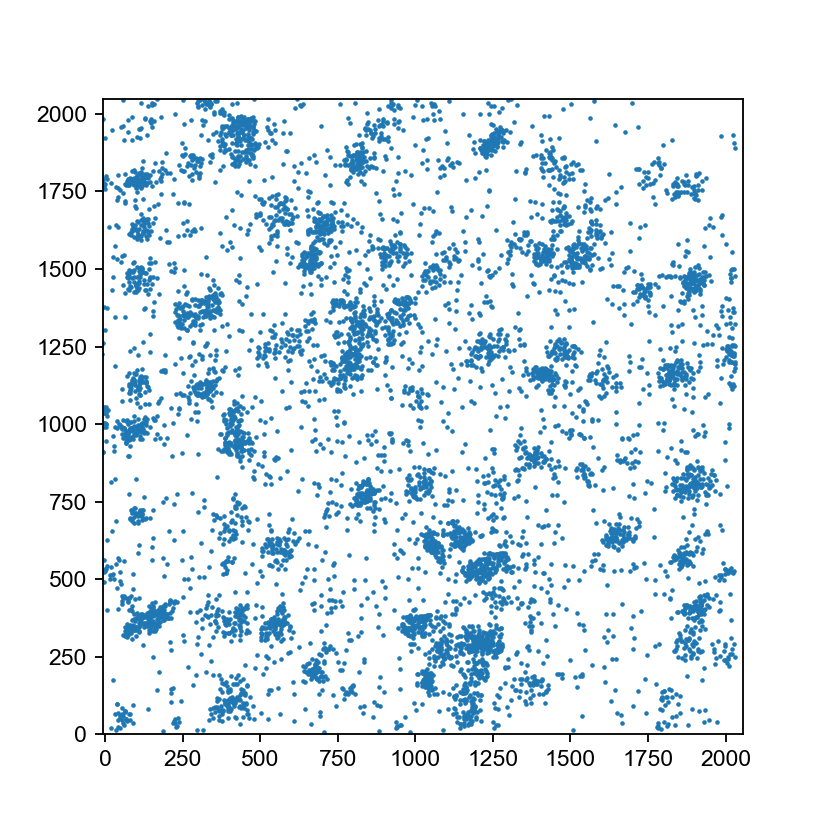

(6890, 6895)

In [34]:
plt.figure(figsize=(5,5),dpi=150)
spots = fov.combo_spots_list[3]
sel_inds = spots[:,0] > 2500
plt.scatter(spots[sel_inds,3], spots[sel_inds,2], s=1)
plt.axis('equal')
plt.xlim([0,2048])
plt.ylim([0,2048])
plt.show()
np.sum(sel_inds), len(sel_inds)

In [36]:
with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['combo']
    combo_ims = _grp['ims'][:]
    
    _grp = _f['unique']
    unique_ims = _grp['ims'][:]
    
    

In [37]:
visual_tools.imshow_mark_3d_v2(combo_ims)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


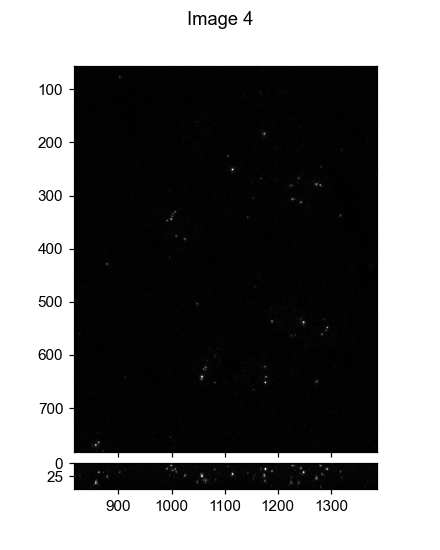

In [41]:
visual_tools.imshow_mark_3d_v2(unique_ims)

# Alignment from RNA

In [40]:
# load RNA class
rna_fov_param = {
    'data_folder':r'\\10.245.74.158\Chromatin_NAS_6\20211216-P_brain_CTP12-RNA',
    'save_folder':r'\\franklin\SSD_01\Pu_Temp\20211216-P_brain_CTP12-RNA',
    'experiment_type': 'RNA',
    'num_threads': 16,
    'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor_from_60_to_50',
    'shared_parameters':{
        'single_im_size':[50,2048,2048],
        'distance_zxy': [250, 108, 108],
        'corr_channels':['750','647'],
        'num_empty_frames': 0, 
        'num_buffer_frames':0,
        'corr_hot_pixel':True,
        'corr_Z_shift':True,
        'corr_bleed':True,
        'min_num_seeds':100,
        'max_num_seeds': None,
        'spot_seeding_th': 1500,
        'normalize_intensity_local':False,
        'normalize_intensity_background':False,
        'corr_gaussian_highpass':True,
        }, 
    }
# create rna_fov class
rna_fov = classes.field_of_view.Field_of_View(rna_fov_param, _fov_id=_fov_id,
                                          _color_info_kwargs={
                                              '_color_filename':'Color_Usage',
                                          }, 
                                          _prioritize_saved_attrs=False,
                                          _save_info_to_file=False,
                                          )

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 14
- Number of field of views: 211
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_6\20211216-P_brain_CTP12-RNA\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
dict_keys(['H0R1', 'H1R2', 'H2R3', 'H3R4', 'H4R5', 'H5R6', 'H6R7', 'H7R8', 'H8R9', 'H9R10', 'H10R11', 'H11R12', 'H12R13', 'H13R14'])
- 14 folders are found according to color-usage annotation.
+ loading fov_info from file: \\franklin\SSD_01\Pu_Temp\20211216-P_brain_CTP12-RNA\Conv_zscan_029.hdf5
++ base attributes loaded:['dapi_im', 'protein_ref_im', 'rna_ref_im'] in 6.645s.
+ loading correction from file: \\franklin\SSD_01\Pu_Temp\20211216-P_brain_CTP12-RNA\Conv_zscan_029.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directl

In [42]:
dapi_im = fov._load_dapi_image()

-- choose dapi images from folder: \\10.245.74.158\Chromatin_NAS_4\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\H0C1.
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_4\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\H0C1\Conv_zscan_029.dax
-- loading illumination correction profile from file:
	 405 illumination_correction_405_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_4\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\H0C1\Conv_zscan_029.dax  in 5.213s
-- removing hot pixels for channels:['405'] in 10.160s
-- correct Z-shifts for channels:['405'] in 8.661s
-- illumination correction for channels: 405, in 3.245s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 28.430s
-- saving fov_info to file: H:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_029.hdf5
++ base attributes saved:['dapi_im'] in 8.746s.


In [47]:
?getAffineTransform

In [48]:
reload(ia.correction_tools.alignment)

<module 'ImageAnalysis3.correction_tools.alignment' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\correction_tools\\alignment.py'>

In [50]:
rna_align_file = r'\\10.245.74.158\Chromatin_NAS_6\20211216-P_brain_CTP12-RNA\Experiments\10x_positions_before.txt'
dna_align_file = r'\\10.245.74.158\Chromatin_NAS_4\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Alignments\10x_positions_after.txt'


In [53]:
R, t = ia.correction_tools.alignment.align_manual_points(rna_align_file, dna_align_file,
                                                         save_folder=fov.save_folder)

- Manually picked points aligned, rotation:
[[ 0.99987138  0.01603818]
 [-0.01603818  0.99987138]],
 translation:[-2132.35179369 -1145.97222401]
-- rotation matrix saved to file:H:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\rotation
-- translation matrix saved to file:H:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\translation


In [54]:
rot_dna_dapi_im, _rot, _dft = ia.correction_tools.alignment.calculate_translation(rna_fov.dapi_im, fov.dapi_im, 
                                                    R,)

-- start calculating drift with rotation between images
-- aligning image -> directly use image
-- directly use ref_image
--- drift: [-0.06 13.04 13.5 ] pixels


In [57]:
_rot, _dft

(array([[ 0.99987138,  0.01603818],
        [-0.01603818,  0.99987138]]),
 array([-0.06, 13.04, 13.5 ]))

<IPython.core.display.Javascript object>


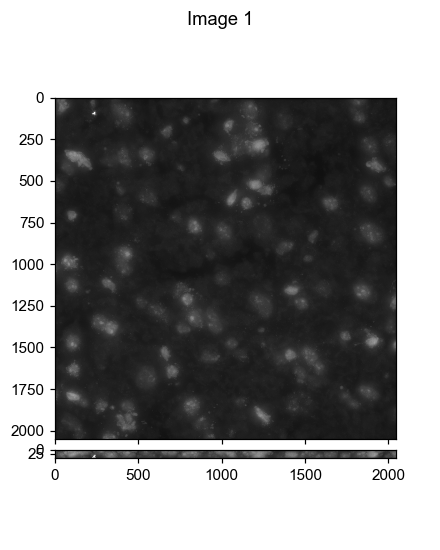

In [55]:
visual_tools.imshow_mark_3d_v2([dapi_im, rot_dna_dapi_im, rna_fov.dapi_im])